# Manipulating raster/vector data with geoutils - Exercise & solutions

In this notebook, we apply the tools learnt in the `intro_geoutils` notebook to a different data set.

We use the data from the Mera geodetic mass balance tutorials to be presented in the following days. They are available in the data folder "04_mb_Mera".\
There are 2 Pleiades DEMs from November 2012 and October 2018.\
There are manual outlines of Mera glacier for the same dates and a sample of RGI outlines for the study area.

## Import the necessary modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

import geoutils as gu
import xdem

## Loading the data ###

### Load the two Pleiades DEMs from 2012 and 2018

Files are named "Mera_Pleiades_2012-11-25_DEM_4m.tif" and "Mera_Pleiades_2018-10-28_DEM_4m.tif".

In [2]:
dem_2012 = gu.Raster("../data/04_mb_Mera/rasters/Mera_Pleiades_2012-11-25_DEM_4m.tif")
dem_2018 = gu.Raster("../data/04_mb_Mera/rasters/Mera_Pleiades_2018-10-28_DEM_4m.tif")

### Load the glacier outlines: Mera outlines from 2012 and 2018, RGI outlines

Files are named: "Mera_outline_2012_realigned.shp", "Mera_outline_2018_realigned.shp" and "Glacier_inventory_around_Mera.shp".

In [3]:
outlines_2012 = gu.Vector("../data/04_mb_Mera/glacier_outlines/Mera_outline_2012_realigned.shp")
outlines_2018 = gu.Vector("../data/04_mb_Mera/glacier_outlines/Mera_outline_2018_realigned.shp")
outlines_rgi = gu.Vector("../data/04_mb_Mera/RGI_shapefiles/Glacier_inventory_around_Mera.shp")

#### **Questions:** 
- What is the spatial resolution of the DEMs? Is it the same for both?
- What is the coordinate reference system of the DEMs and outlines? Is it the same for all?
- Are the DEM extents the same?

Use the code cell below to type your commands and find the answer to the questions.

In [4]:
print(dem_2012.info())

Driver:               GTiff 
Opened from file:     ../data/04_mb_Mera/rasters/Mera_Pleiades_2012-11-25_DEM_4m.tif 
Filename:             ../data/04_mb_Mera/rasters/Mera_Pleiades_2012-11-25_DEM_4m.tif 
Loaded?               False 
Modified since load?  False 
Size:                 4456, 8983
Number of bands:      1
Data types:           ('float32',)
Coordinate System:    ['EPSG:32645']
NoData Value:         -9999.0
Pixel Size:           4.0, 4.0
Upper Left Corner:    481480.0, 3058068.0
Lower Right Corner:   499304.0, 3094000.0



In [5]:
print(dem_2018.info())

Driver:               GTiff 
Opened from file:     ../data/04_mb_Mera/rasters/Mera_Pleiades_2018-10-28_DEM_4m.tif 
Filename:             ../data/04_mb_Mera/rasters/Mera_Pleiades_2018-10-28_DEM_4m.tif 
Loaded?               False 
Modified since load?  False 
Size:                 3099, 3822
Number of bands:      1
Data types:           ('float32',)
Coordinate System:    ['EPSG:32645']
NoData Value:         -9999.0
Pixel Size:           4.0, 4.0
Upper Left Corner:    481612.0, 3057472.0
Lower Right Corner:   494008.0, 3072760.0



In [6]:
print(dem_2012.crs.to_wkt())

PROJCS["WGS 84 / UTM zone 45N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",87],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32645"]]


In [7]:
print(outlines_2012.crs.to_wkt())

PROJCRS["WGS 84 / UTM zone 45N",BASEGEOGCRS["WGS 84",ENSEMBLE["World Geodetic System 1984 ensemble",MEMBER["World Geodetic System 1984 (Transit)"],MEMBER["World Geodetic System 1984 (G730)"],MEMBER["World Geodetic System 1984 (G873)"],MEMBER["World Geodetic System 1984 (G1150)"],MEMBER["World Geodetic System 1984 (G1674)"],MEMBER["World Geodetic System 1984 (G1762)"],MEMBER["World Geodetic System 1984 (G2139)"],ELLIPSOID["WGS 84",6378137,298.257223563,LENGTHUNIT["metre",1]],ENSEMBLEACCURACY[2.0]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],ID["EPSG",4326]],CONVERSION["UTM zone 45N",METHOD["Transverse Mercator",ID["EPSG",9807]],PARAMETER["Latitude of natural origin",0,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8801]],PARAMETER["Longitude of natural origin",87,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8802]],PARAMETER["Scale factor at natural origin",0.9996,SCALEUNIT["unity",1],ID["EPSG",8805]],PARAMETER["False easting",500000,LENGTHUNIT["metre",1],ID["EPSG"

In [8]:
print(outlines_rgi.crs.to_wkt())

GEOGCRS["WGS 84",ENSEMBLE["World Geodetic System 1984 ensemble",MEMBER["World Geodetic System 1984 (Transit)"],MEMBER["World Geodetic System 1984 (G730)"],MEMBER["World Geodetic System 1984 (G873)"],MEMBER["World Geodetic System 1984 (G1150)"],MEMBER["World Geodetic System 1984 (G1674)"],MEMBER["World Geodetic System 1984 (G1762)"],MEMBER["World Geodetic System 1984 (G2139)"],ELLIPSOID["WGS 84",6378137,298.257223563,LENGTHUNIT["metre",1]],ENSEMBLEACCURACY[2.0]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],CS[ellipsoidal,2],AXIS["geodetic latitude (Lat)",north,ORDER[1],ANGLEUNIT["degree",0.0174532925199433]],AXIS["geodetic longitude (Lon)",east,ORDER[2],ANGLEUNIT["degree",0.0174532925199433]],USAGE[SCOPE["Horizontal component of 3D system."],AREA["World."],BBOX[-90,-180,90,180]],ID["EPSG",4326]]


### Answers:
=> Both DEMs have the same spatial resolution: 4 m  
=> All files have the same CRS: EPSG 32645 = UTM zone 45N, except for RGI which is in lat/lon  
=> The DEM extents differ and hence the raster sizes !

# Terrain attributes

#### Calculate the hillshade of 2012 and 2018 DEMs

In [9]:
hillshade_2012 = xdem.terrain.hillshade(dem_2012)
hillshade_2018 = xdem.terrain.hillshade(dem_2018)

#### Plot both hillshades and overlay the outlines of Mera glacier for the corresponding year

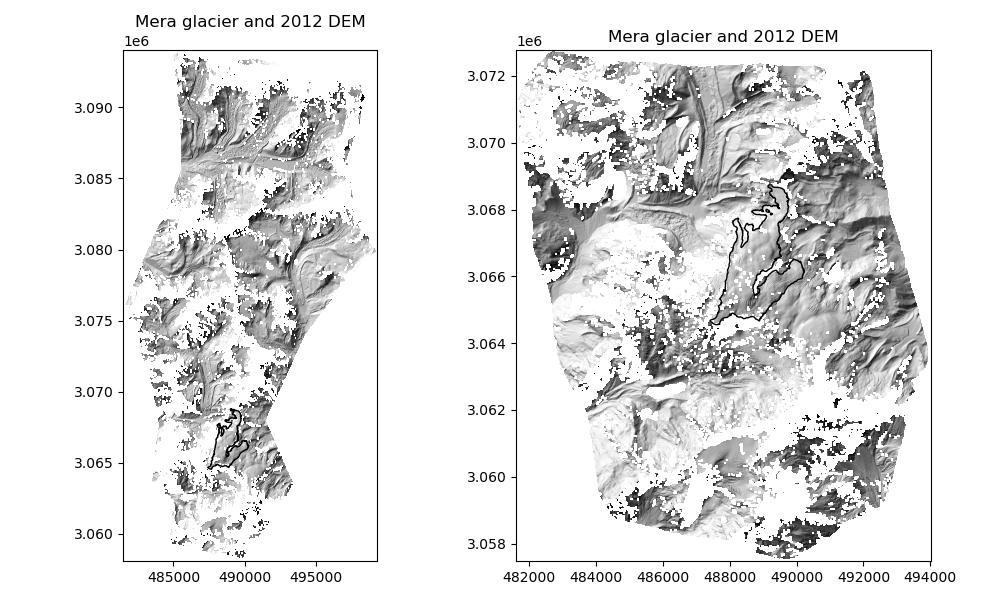

In [10]:
fig = plt.figure(figsize=(10,6))

ax1 = plt.subplot(121)
hillshade_2012.show(cmap='gray', add_cbar=False)
outlines_2012.show(ax=ax1, facecolor='none', edgecolor='k')
ax1.set_title('Mera glacier and 2012 DEM')

ax2 = plt.subplot(122)
hillshade_2018.show(cmap='gray', add_cbar=False)
outlines_2018.show(ax=ax2, facecolor='none', edgecolor='k')
ax2.set_title('Mera glacier and 2012 DEM')

plt.tight_layout()
plt.show()

### Comment what you see:
- what are the white (transparent) areas on the figure?
- which DEM has a larger extent?

#### Calculate and plot slope and aspect for the 2018 DEM

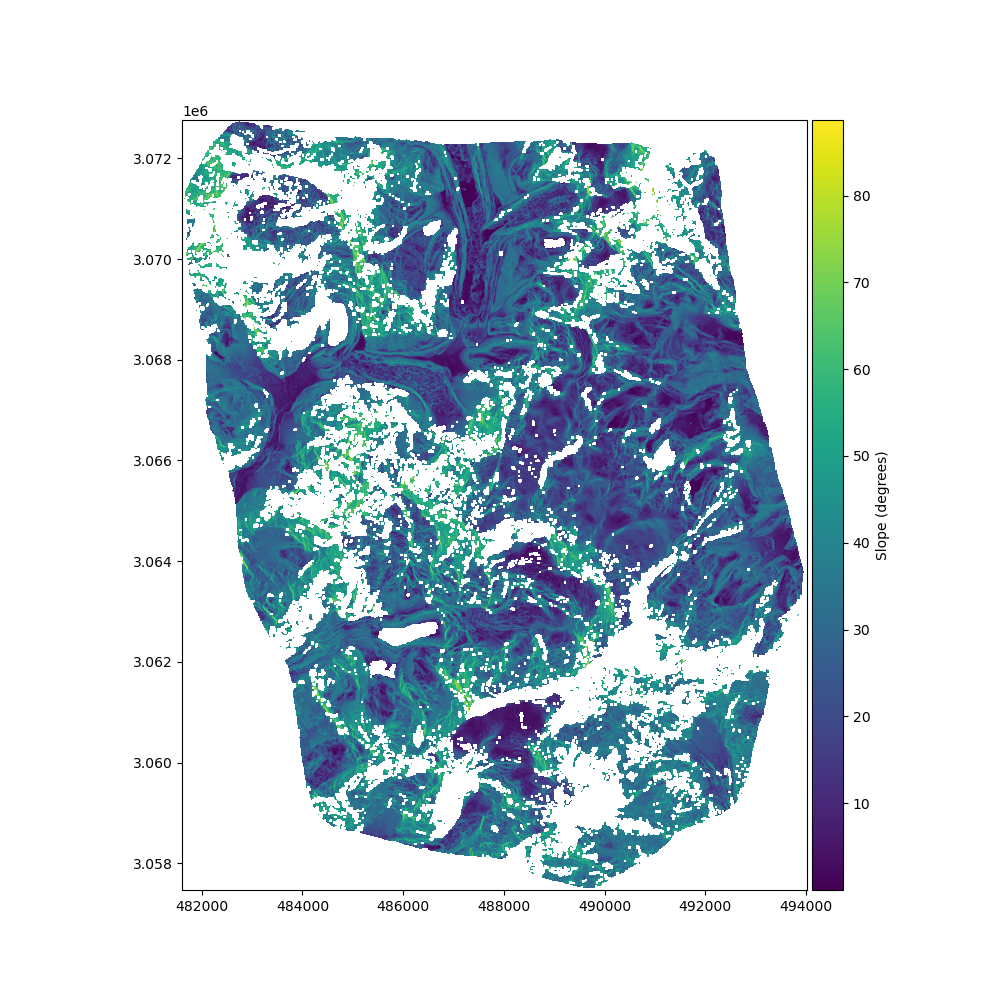

In [11]:
slope = xdem.terrain.slope(dem_2018)
plt.figure(figsize=(10,10))
slope.show(cbar_title="Slope (degrees)")
plt.show()

#### Calculate and plot aspect for the 2018 DEM

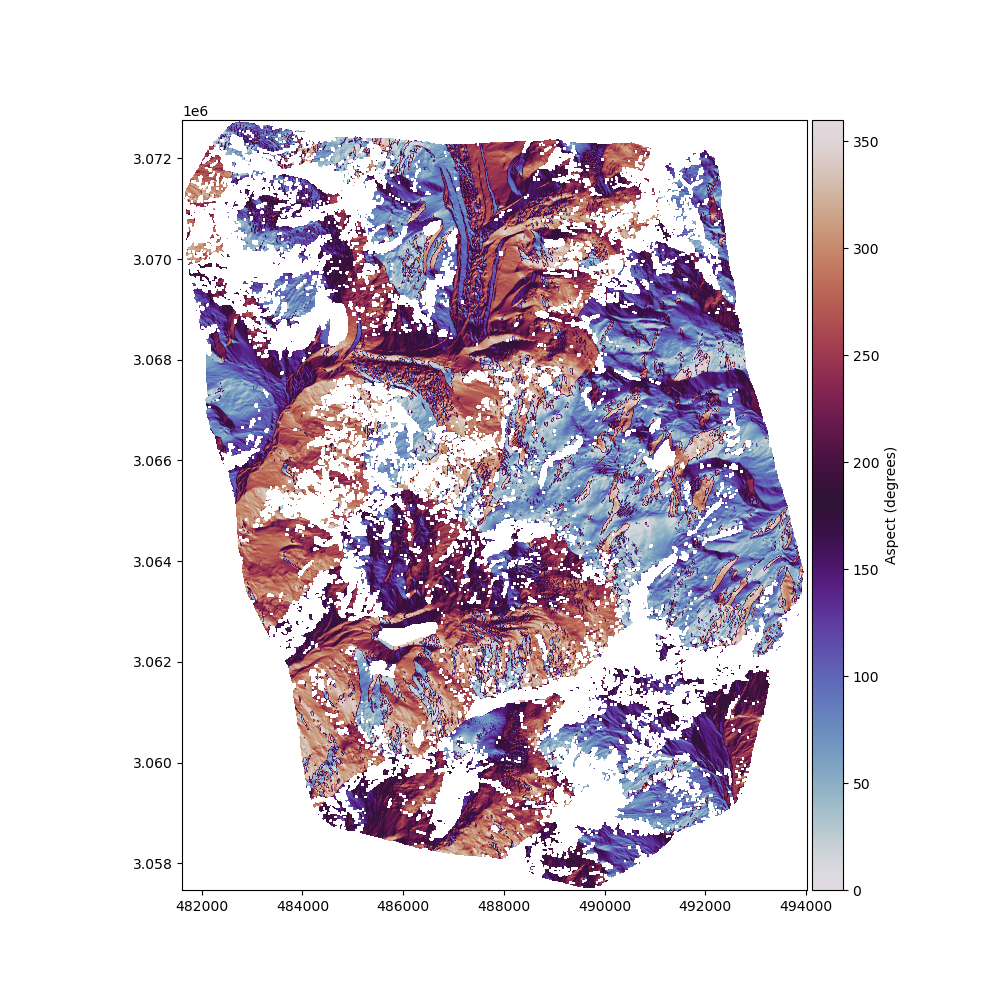

In [12]:
aspect = xdem.terrain.aspect(dem_2018)
plt.figure(figsize=(10,10))
aspect.show(cbar_title="Aspect (degrees)", cmap="twilight")
plt.show()

# Calculating the difference between the two DEMs

In [13]:
ddem = dem_2018 - dem_2012

ValueError: Both rasters must have the same shape, transform and CRS.

#### An error occurs ! Why is that?

# Handling rasters projection and georeferencing

### Reproject the two DEMs on the same grid
Check afterwards that both DEM have same shape and georeferences.

In [14]:
dem_2012_proj = dem_2012.reproject(dst_ref=dem_2018)
print(dem_2012_proj.info())
print(dem_2018.info())

Driver:               None 
Opened from file:     None 
Filename:             None 
Loaded?               True 
Modified since load?  True 
Size:                 3099, 3822
Number of bands:      1
Data types:           ('float32',)
Coordinate System:    ['EPSG:32645']
NoData Value:         -9999.0
Pixel Size:           4.0, 4.0
Upper Left Corner:    481612.0, 3057472.0
Lower Right Corner:   494008.0, 3072760.0

Driver:               GTiff 
Opened from file:     ../data/04_mb_Mera/rasters/Mera_Pleiades_2018-10-28_DEM_4m.tif 
Filename:             ../data/04_mb_Mera/rasters/Mera_Pleiades_2018-10-28_DEM_4m.tif 
Loaded?               True 
Modified since load?  False 
Size:                 3099, 3822
Number of bands:      1
Data types:           ('float32',)
Coordinate System:    ['EPSG:32645']
NoData Value:         -9999.0
Pixel Size:           4.0, 4.0
Upper Left Corner:    481612.0, 3057472.0
Lower Right Corner:   494008.0, 3072760.0



### Now calculate the elevation change again

In [15]:
ddem = dem_2018 - dem_2012_proj

## Plot the elevation change map

#### Make a plot with the following features: 
1) Plot the elevation difference with a color scale of +50/-50 m
2) Plot Mera glacier outlines in black
3) Include a color scale label
4) Include a figure title

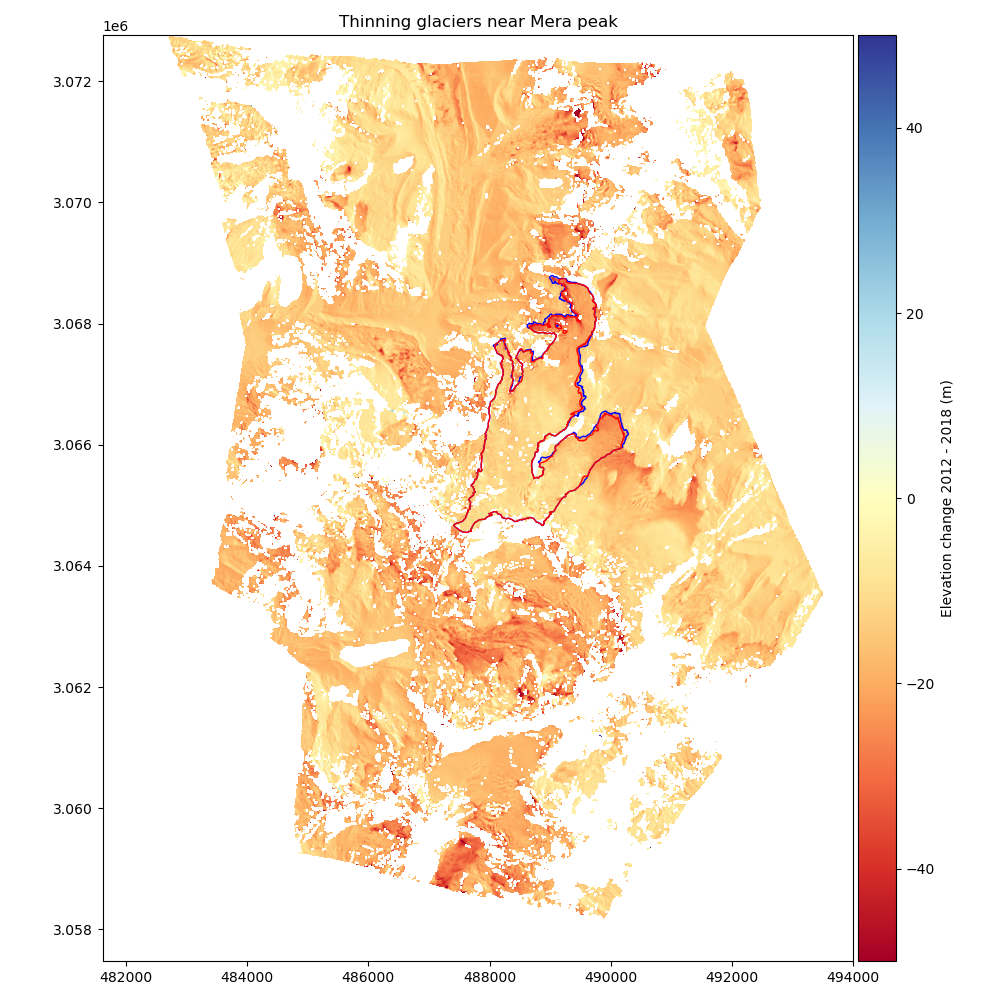

In [16]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
outlines_2012.show(ax=ax, facecolor='none', edgecolor='b', zorder=2)
outlines_2018.show(ax=ax, facecolor='none', edgecolor='r', zorder=3)
outlines_rgi.show(ax=ax, facecolor='none', edgecolor='k', zorder=4)
ddem.show(ax=ax, cmap='RdYlBu', vmin=-50, vmax=50, cbar_title='Elevation change 2012 - 2018 (m)', zorder=1)
ax.set_title('Thinning glaciers near Mera peak')
plt.tight_layout()
plt.show()

## Save the results in a file named "Pleiades_2012_2018_dh.tif"

In [17]:
ddem.save("../data/tmp_Pleiades_2012_2018_dh.tif")

# Calculate zonal statistics
Here we want to calculate the mean elevation change on and off glaciers.

## Rasterize the RGI glacier outlines on the same grid as ddem

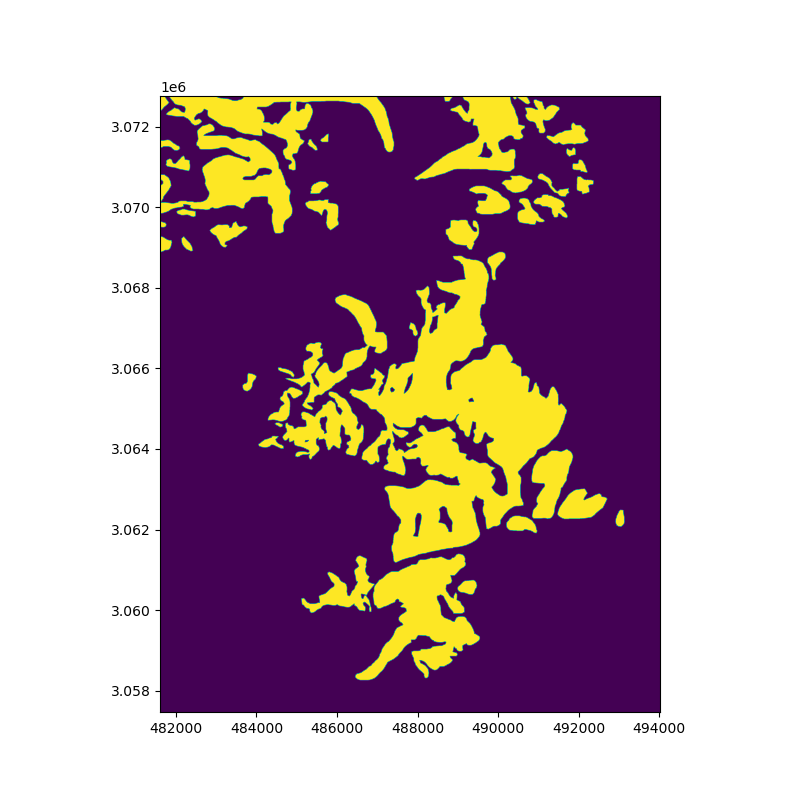

In [18]:
glaciers_mask = outlines_rgi.create_mask(ddem)
plt.figure(figsize=(8,8))
glaciers_mask.show(add_cbar=False)
plt.show()

### Calculate mean dh over glaciers or stable terrain

Over glaciers:

In [19]:
print(np.mean(ddem[glaciers_mask]))

-16.60185185614564


Over stable terrain

In [ ]:
print(np.mean(ddem[~glaciers_mask]))

### Can you explain what is the issue?